# Numerical Integration

How you integrate the following equation numerically?

$ f(x) = x^2 $

Let's look at a plot!


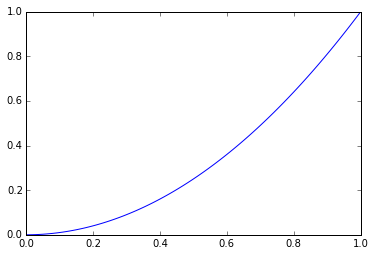

In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

## initialize x and y
#
x = np.arange(101)/100.
y = x*x

## create plot
#
plt.plot(x,y)
plt.show()


It's easy to integrate this simple equation analytically:

$ \int_0^1 x^2 \, dx = 1/3$

However, for many functions the solution may not be so easy to find.  So it would be nice to know how to integrate functions numerically.

## Random Sampling

One method is to sample the function at discrete points and use these function values to approximate the integral.  What if we sampled randomly?  What is the integral approximation if you just sample at one point?


[ 0.48463357]
[ 0.2348697]


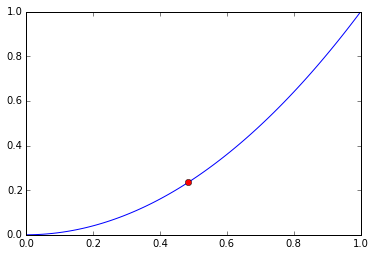

In [2]:
u = np.random.random_sample(1)
v = u*u

print u
print v

plt.plot(x,y)
plt.plot(u, v, 'ro')
plt.show()


What's an estimate of the integral $ \int_0^1 x^2 \, dx$?  Since the interval is $[0, 1]$, an approximation for the integral is just the value of the function at the sampled point:

In [3]:

print "Estimate of the integral is %f" % v


Estimate of the integral is 0.234870


Obviously not a very good estimate!  So how can we do better?  Sample at more points and take the average.  Let's try three points.

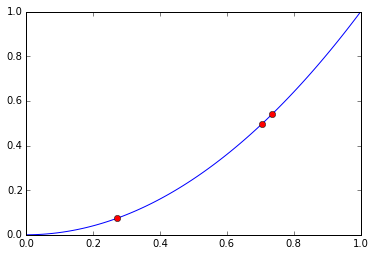

Estimate of the integral is 0.370594


In [6]:
n = 3
u = np.random.random_sample(n)
v = u*u

plt.plot(x,y)
plt.plot(u, v, 'ro')
plt.show()

print "Estimate of the integral is %f" % (sum(v)/n)


## Discretization

Perhaps we can do better by sampling the function at regular intervals.  Breaking the interval into discrete intervals (cells) is called discretization.

Let the sampling interval (cell width) $h = \Delta x$ be fixed.  Then the integral within any interval is

$ \quad S_i = \int_{x_i}^{x_i+h} f(x) \, dx$

One could estimate $S_i$ by expanding $f(x)$ in a Taylor's series expansion and then integrate each term analytically.  In general the Taylor's expansion has an infinite number of terms so one is forced to truncate the series at some point where the left over part is the error.

$ \quad f(x_{i+1}) = f(x_i) + h f^{\prime}(x_i) + \frac{1}{2}h^2 f^{\prime\prime}(x_i) + err(0(h^3)) $

If you think about it, the error term will be proportional to a power of $h$, for example,

$\quad err(h) = a_{n+1} h^{n+1} + ... $

As $h$ tends to $0$, the error term also approaches $0$ at the rate $h^{n+1}$.  Using a polynomial interpolating functions, one can derive the following methods for numerical integration.

## Midpoint Rule

$ S_i = h \, f((x_{i+1} + x_i)/2) \quad$ (zeroth order)


## Trapezoidal Rule

$ S_i = {h \over 2} \, [f(x_i) + f(x_{i+1})] \quad$ (first order)

## Simpson Rule

$ S_i = {h \over 6} \, [f(x_i) + 4f((x_{i+1} + x_i)/2) + f(x_{i+1})] \quad$ (second order)


